In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
%matplotlib inline
%config InlineBackend.figure_format ='retina'

# Looking at Labeled Data Only. 504 Hurricane Tweets. 502 Fire Tweets

In [2]:
df = pd.read_csv('../Data/df8_SUPER.csv')

In [3]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
df.shape

(1006, 3)

In [5]:
df['disaster'].value_counts()

hurricane    504
fire         502
Name: disaster, dtype: int64

In [6]:
hurricane = df[df['disaster']=='hurricane']

In [7]:
fire = df[df['disaster']=='fire']

## Hurricane EDA

In [198]:
h_custom_sw = stopwords.words('english')

In [199]:
h_additional_sw = ['go','bahamas', 'center','weather', 'safe', 'want', 'could','long','via','day',
                'us','little','last','storm','heard','florida','following','get','got','good','proud',
                 'black','ready','going', 'still','planned','people','back','away','path','one',
                ]

In [200]:
for word in h_additional_sw:
    h_custom_sw.append(word)

In [201]:
tvec = TfidfVectorizer(stop_words=h_custom_sw, min_df=5, max_df=1.0,ngram_range=(1,2))

In [202]:
term_mat = tvec.fit_transform(hurricane['text'])

In [203]:
term_df = pd.DataFrame(term_mat.toarray(), columns=tvec.get_feature_names())

In [204]:
tvec.get_feature_names()

['abaco',
 'access',
 'according',
 'affected',
 'aftermath',
 'agency',
 'ago',
 'aid',
 'already',
 'also',
 'antonioguterres',
 'anyone',
 'anything',
 'anything like',
 'area',
 'areas',
 'around',
 'assistance',
 'bahama',
 'beach',
 'become',
 'becoming',
 'best',
 'bring',
 'care',
 'category',
 'caused',
 'change',
 'children',
 'church',
 'close',
 'coast',
 'colleagues',
 'come',
 'coming',
 'completely',
 'continue',
 'control',
 'control room',
 'coordinated',
 'coordinated government',
 'crisis',
 'critical',
 'damage',
 'days',
 'death',
 'dedication',
 'depression',
 'destroyed',
 'devastated',
 'devastation',
 'disaster',
 'disaster relief',
 'disasters',
 'displaced',
 'donate',
 'donate today',
 'donated',
 'donating',
 'donation',
 'donations',
 'done',
 'dont',
 'dorian',
 'dorian relief',
 'drive',
 'drop',
 'due',
 'east',
 'east coast',
 'efforts',
 'emergency',
 'evacuees',
 'everyone',
 'expected',
 'families',
 'family',
 'find',
 'first',
 'food',
 'forget',


In [205]:
h_wts = []

for column in term_df.columns:
    h_wts.append(term_df[column].max())


In [207]:
h_tfidf = pd.DataFrame({'words':term_df.columns, 'weights':h_wts})

In [208]:
hurricane_eda = h_tfidf.sort_values('weights', ascending=False)

In [231]:
features = ['free','church','children',
'pray','family','government','shelter',
'loved ones', 'relief fund','services']

In [232]:
hurricane_chart = term_df[features]

In [233]:
h_wts = []

for column in hurricane_chart.columns:
    h_wts.append(hurricane_chart[column].max())


In [234]:
h_tfidf = pd.DataFrame({'words':hurricane_chart.columns, 'weights':h_wts})

In [235]:
h_tfidf.sort_values('weights', inplace=True)

In [ ]:
plt.figure(figsize=(20,15))
plt.barh(f_tfidf['words'],
        f_tfidf['weights'],
        color='mediumseagreen')
plt.title('TFIDF Weights for Fire Needs', fontsize=20)
plt.xlabel('TFIDF Weights', fontsize=20)
plt.ylabel('Fire Needs', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text yticklabel objects>)

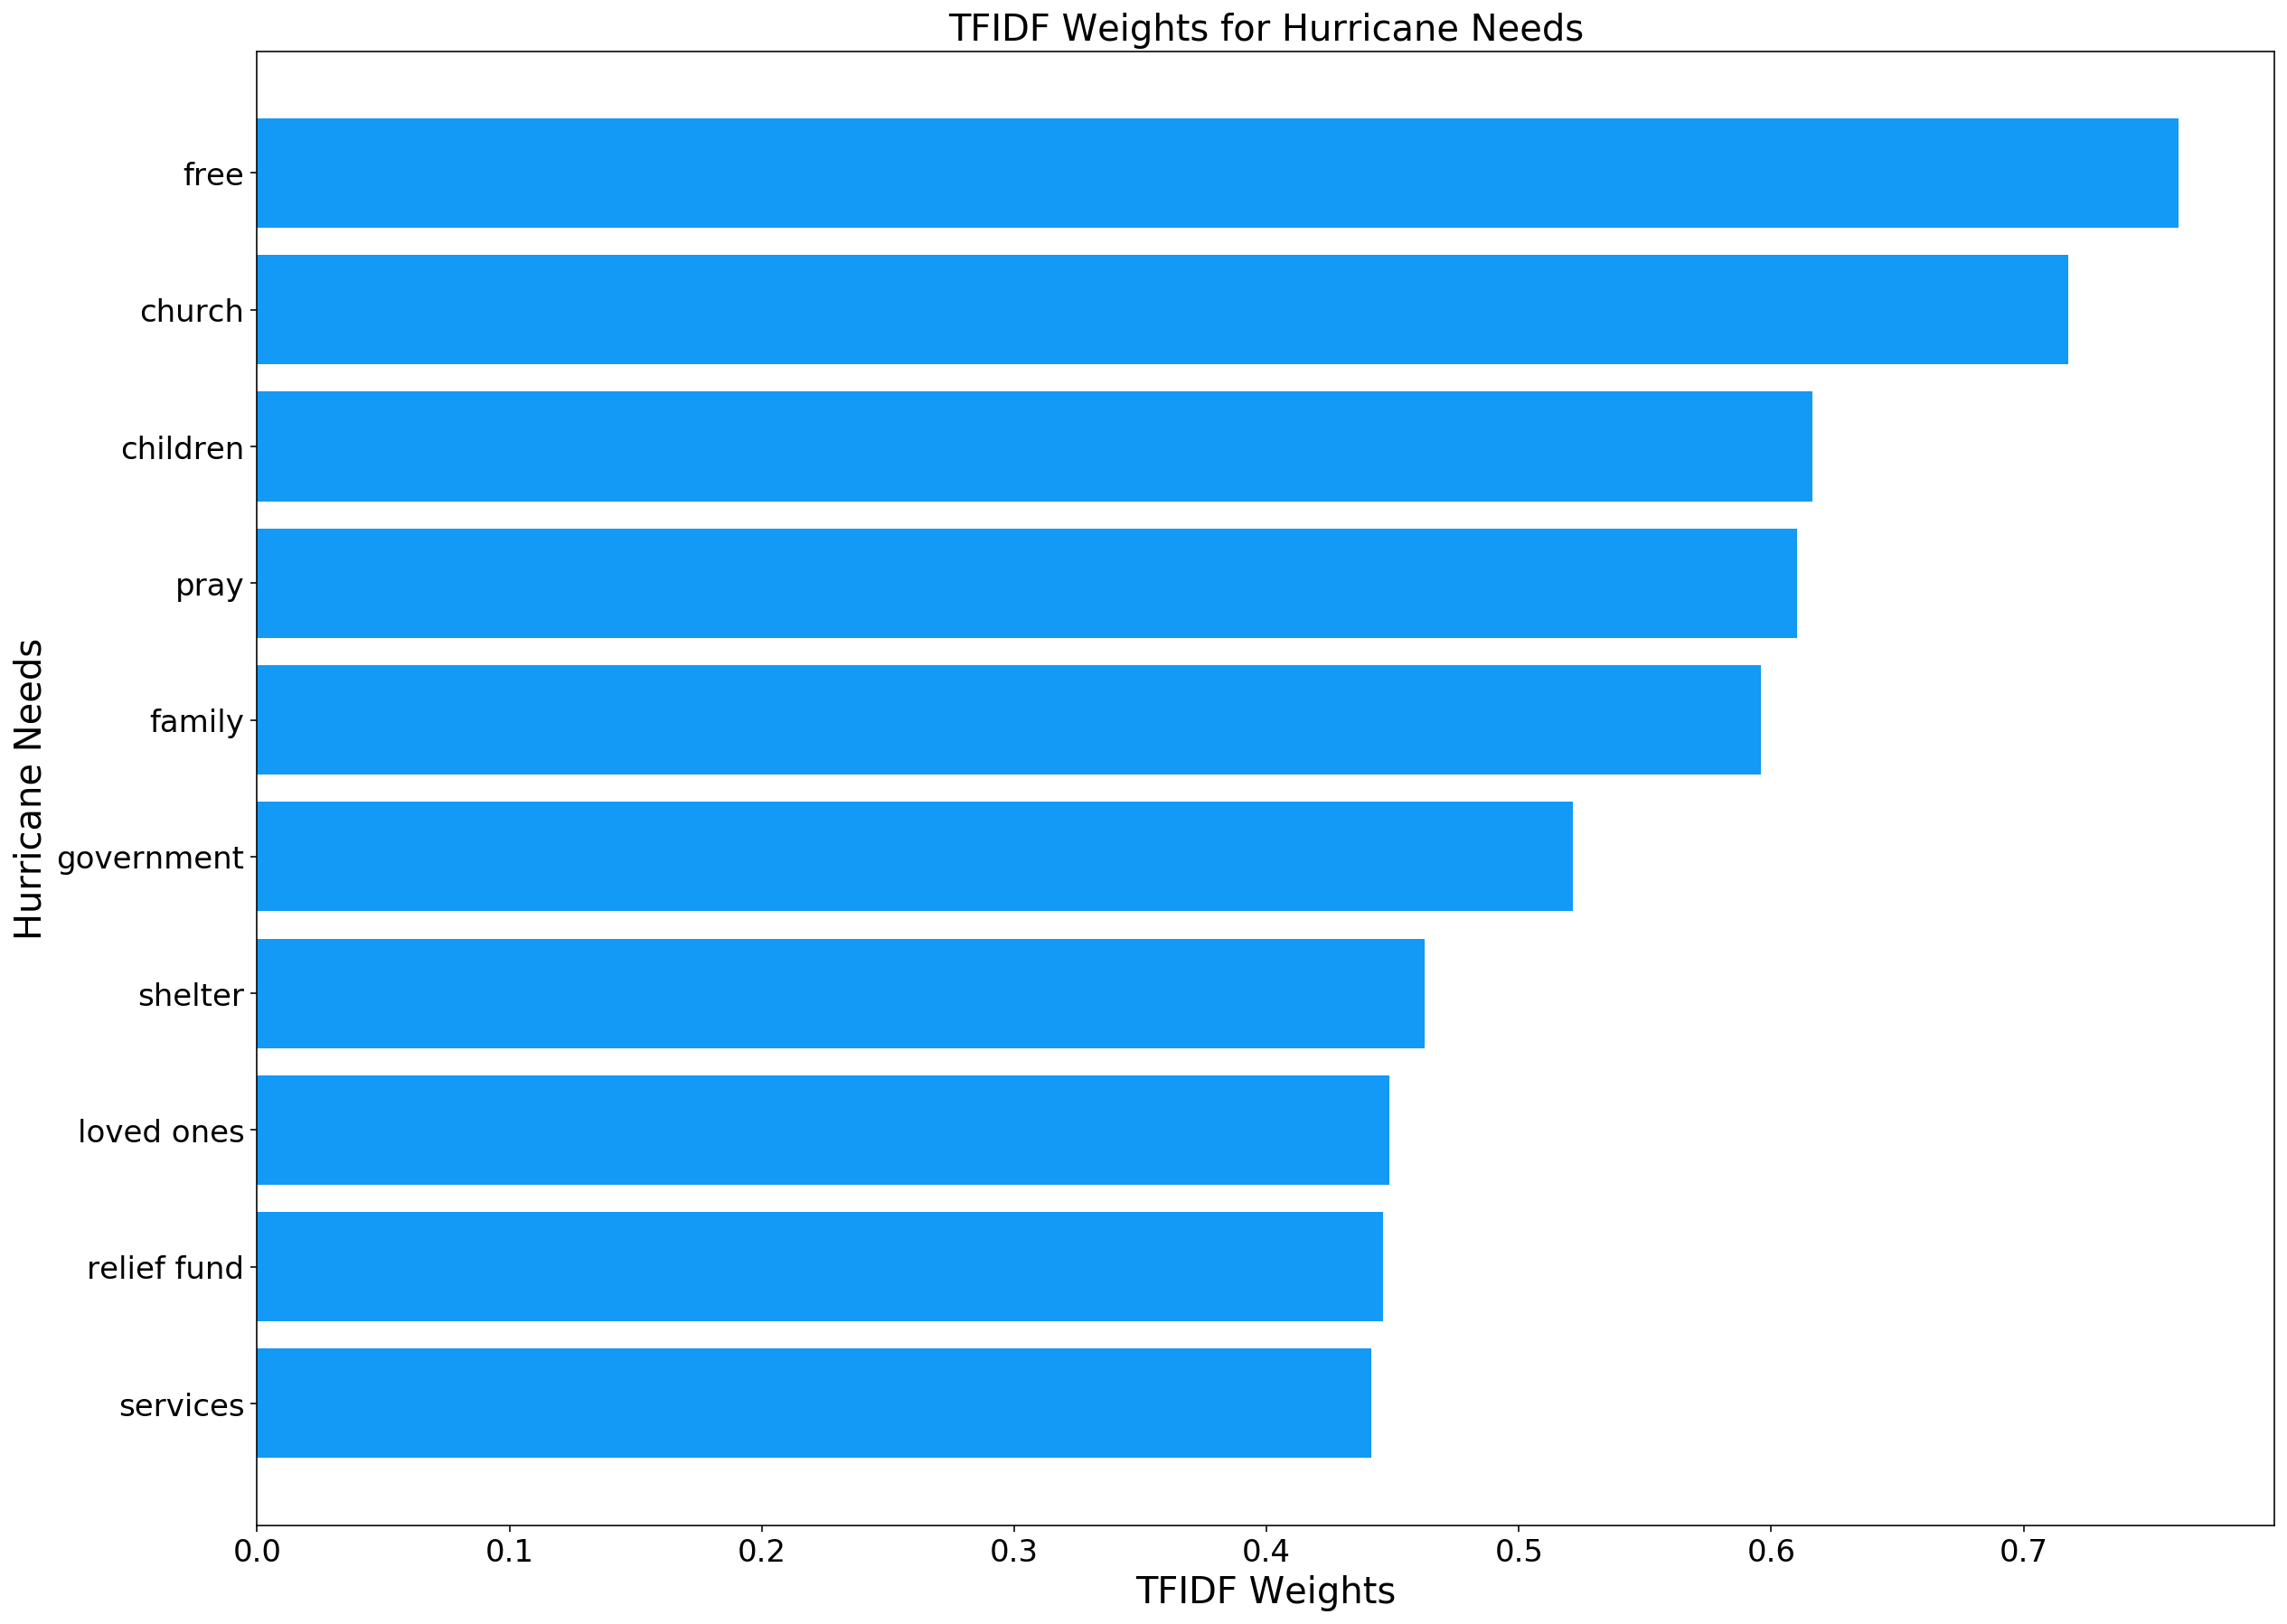

In [242]:
plt.figure(figsize=(20,15))
plt.barh(h_tfidf['words'],
        h_tfidf['weights'],
        color='#1399F6')
plt.title('TFIDF Weights for Hurricane Needs', fontsize=20)
plt.xlabel('TFIDF Weights', fontsize=20)
plt.ylabel('Hurricane Needs', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

In [18]:
for word in hurricane_eda['words']:
    print(f"'{word}',")

'line',
'time',
'emergency',
'news',
'missing',
'live',
'storms',
'story',
'hurricane',
'help',
'please',
'threatening',
'times',
'tropical',
'donations',
'water',
'weekend',
'dorian',
'work',
'sad',
'life',
'team',
'done',
'love',
'forget',
'happy',
'everyone',
'expected',
'south',
'recovery',
'living',
'become',
'donated',
'come',
'trump',
'week',
'left',
'new',
'many',
'today',
'winds',
'damage',
'care',
'well',
'house',
'caused',
'free',
'latest',
'hope',
'heading',
'access',
'really',
'much',
'think',
'humanitarian',
'best',
'thousands',
'islands',
'read',
'grey',
'show',
'mission',
'know',
'supplies',
'president',
'right',
'would',
'drop',
'anyone',
'tropical dorian',
'coming',
'church',
'list',
'share',
'full',
'find',
'evacuees',
'anything',
'home',
'displaced',
'friends',
'helping',
'stories',
'way',
'national',
'made',
'place',
'close',
'ago',
'hurricanes',
'island',
'thank',
'rt',
'aid',
'local',
'organization',
'may',
'keep',
'first',
'wake',
'response',
'need',
'victims',


In [62]:
pd.set_option('display.max_colwidth', -1)

In [239]:
hurricane[hurricane['text'].str.contains('services')][['text']]

,text
261,abaco the coopers town community clinic is partially operational days after struck we have been working with national local authorities in the repairs needed so that the population have access to health services
315,our troops support working in collaboration with local emergency services in their recovery efforts during following in
319,if you are assessing damage this weekend remember that crisis cleanup offers free debris removal and cleanup services take pictures of any damage and call to request assistance
321,if you are assessing damage this weekend remember that crisis cleanup offers free debris removal and cleanup services take pictures of any damage and call to request assistance
336,partner spotlight even as conducts their primary mission of its components military services continue to support relief efforts learn more


In [22]:
df[df['text'].str.contains('need')]

,text,requesting_help,disaster
5,my little x island doesn t need this still so many houses with go visit ttrump,0,hurricane
46,let this storm come and go in peace we the ppl of svg dont need no stress ok,0,hurricane
50,i was really hoping not to need my annual hurricane supplies list but looks to be heading this way stocking up today just in case,0,hurricane
65,after disasters like it is inspiring to see individuals and organizations collaborating to meet the needs of those in crisis today we are thrilled to have partnered with and as we provided safe water for their work in the abacos,1,hurricane
71,we are doing our best to help the in their time of need please join us at don julio mexican grill,1,hurricane
...,...,...,...
914,we re honored to support our community by providing free emergency boarding in the wake of disasters if you ever need to evacuate we have some tips to help you and your pets be ready at a moments notice,1,fire
923,are you in need of help food or money to cover rent after the heres where to go,1,fire
931,long lines at the sonoma county assistance center as folks impacted by the kincade fire seek help some people have gone through this before with tubbs fire and they re in need yet again,1,fire
936,is contained thanks to all during this time of need very proud of the mutual aid provided by our own including hughson fire dept denair fire district los banos fire dept,0,fire


# Fire EDA

In [243]:
f_custom_sw = stopwords.words('english')

In [ ]:
f_additional_sw = ['go','bahamas', 'center','weather', 'safe', 'want', 'could','long','via','day',
                'us','little','last','storm','heard','florida','following','get','got','good','proud',
                 'black','ready','going', 'still','planned','people','back','away','path','one',
                ]

In [ ]:
for word in f_additional_sw:
    f_custom_sw.append(word)

In [244]:
tvec = TfidfVectorizer(stop_words=f_custom_sw, min_df=5, max_df=1.0,ngram_range=(1,2))

In [245]:
term_mat = tvec.fit_transform(fire['text'])

In [246]:
term_df = pd.DataFrame(term_mat.toarray(), columns=tvec.get_feature_names())

In [247]:
tvec.get_feature_names()

['able',
 'according',
 'acres',
 'acres contained',
 'across',
 'affected',
 'aid',
 'air',
 'alexander',
 'alexander valley',
 'also',
 'amazing',
 'anniversary',
 'area',
 'around',
 'article',
 'assistance',
 'assistance center',
 'available',
 'back',
 'bay',
 'bay area',
 'beautiful',
 'best',
 'big',
 'blaze',
 'bring',
 'burn',
 'burn scar',
 'burned',
 'burning',
 'burns',
 'businesses',
 'ca',
 'cal',
 'cal fire',
 'california',
 'californias',
 'call',
 'came',
 'center',
 'center healdsburg',
 'change',
 'city',
 'cleanup',
 'climate',
 'climate change',
 'come',
 'coming',
 'communities',
 'community',
 'community center',
 'contained',
 'containment',
 'continue',
 'country',
 'county',
 'county acres',
 'criminal',
 'criminal probation',
 'cross',
 'current',
 'customers',
 'damage',
 'damaged',
 'day',
 'days',
 'declaration',
 'declaration disaster',
 'destroyed',
 'details',
 'disaster',
 'disasters',
 'donate',
 'donated',
 'doors',
 'due',
 'early',
 'efforts',
 'em

In [248]:
f_wts = []

for column in term_df.columns:
    f_wts.append(term_df[column].max())


In [249]:
f_tfidf = pd.DataFrame({'words':term_df.columns, 'weights':f_wts})

In [250]:
fire_eda = f_tfidf.sort_values('weights', ascending=False)

In [109]:
features = ['containment','lost','map','lifted','resilience','businesses','structures','offering',
           'recover','share','relief','food','climate change','federal','first responders',
           'home','together','evacuation','assistance center','safety','tax','service','aid','volunteers',
           'local assistance']

In [251]:
features = ['containment','map','lifted','resilience','businesses','structures',
           'climate change','federal',
           'evacuation','tax','service'
           ]

In [252]:
fire_chart = term_df[features]

In [253]:
f_wts = []

for column in fire_chart.columns:
    f_wts.append(fire_chart[column].max())


In [254]:
f_tfidf = pd.DataFrame({'words':fire_chart.columns, 'weights':f_wts})

In [255]:
f_tfidf.sort_values('weights', inplace=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text yticklabel objects>)

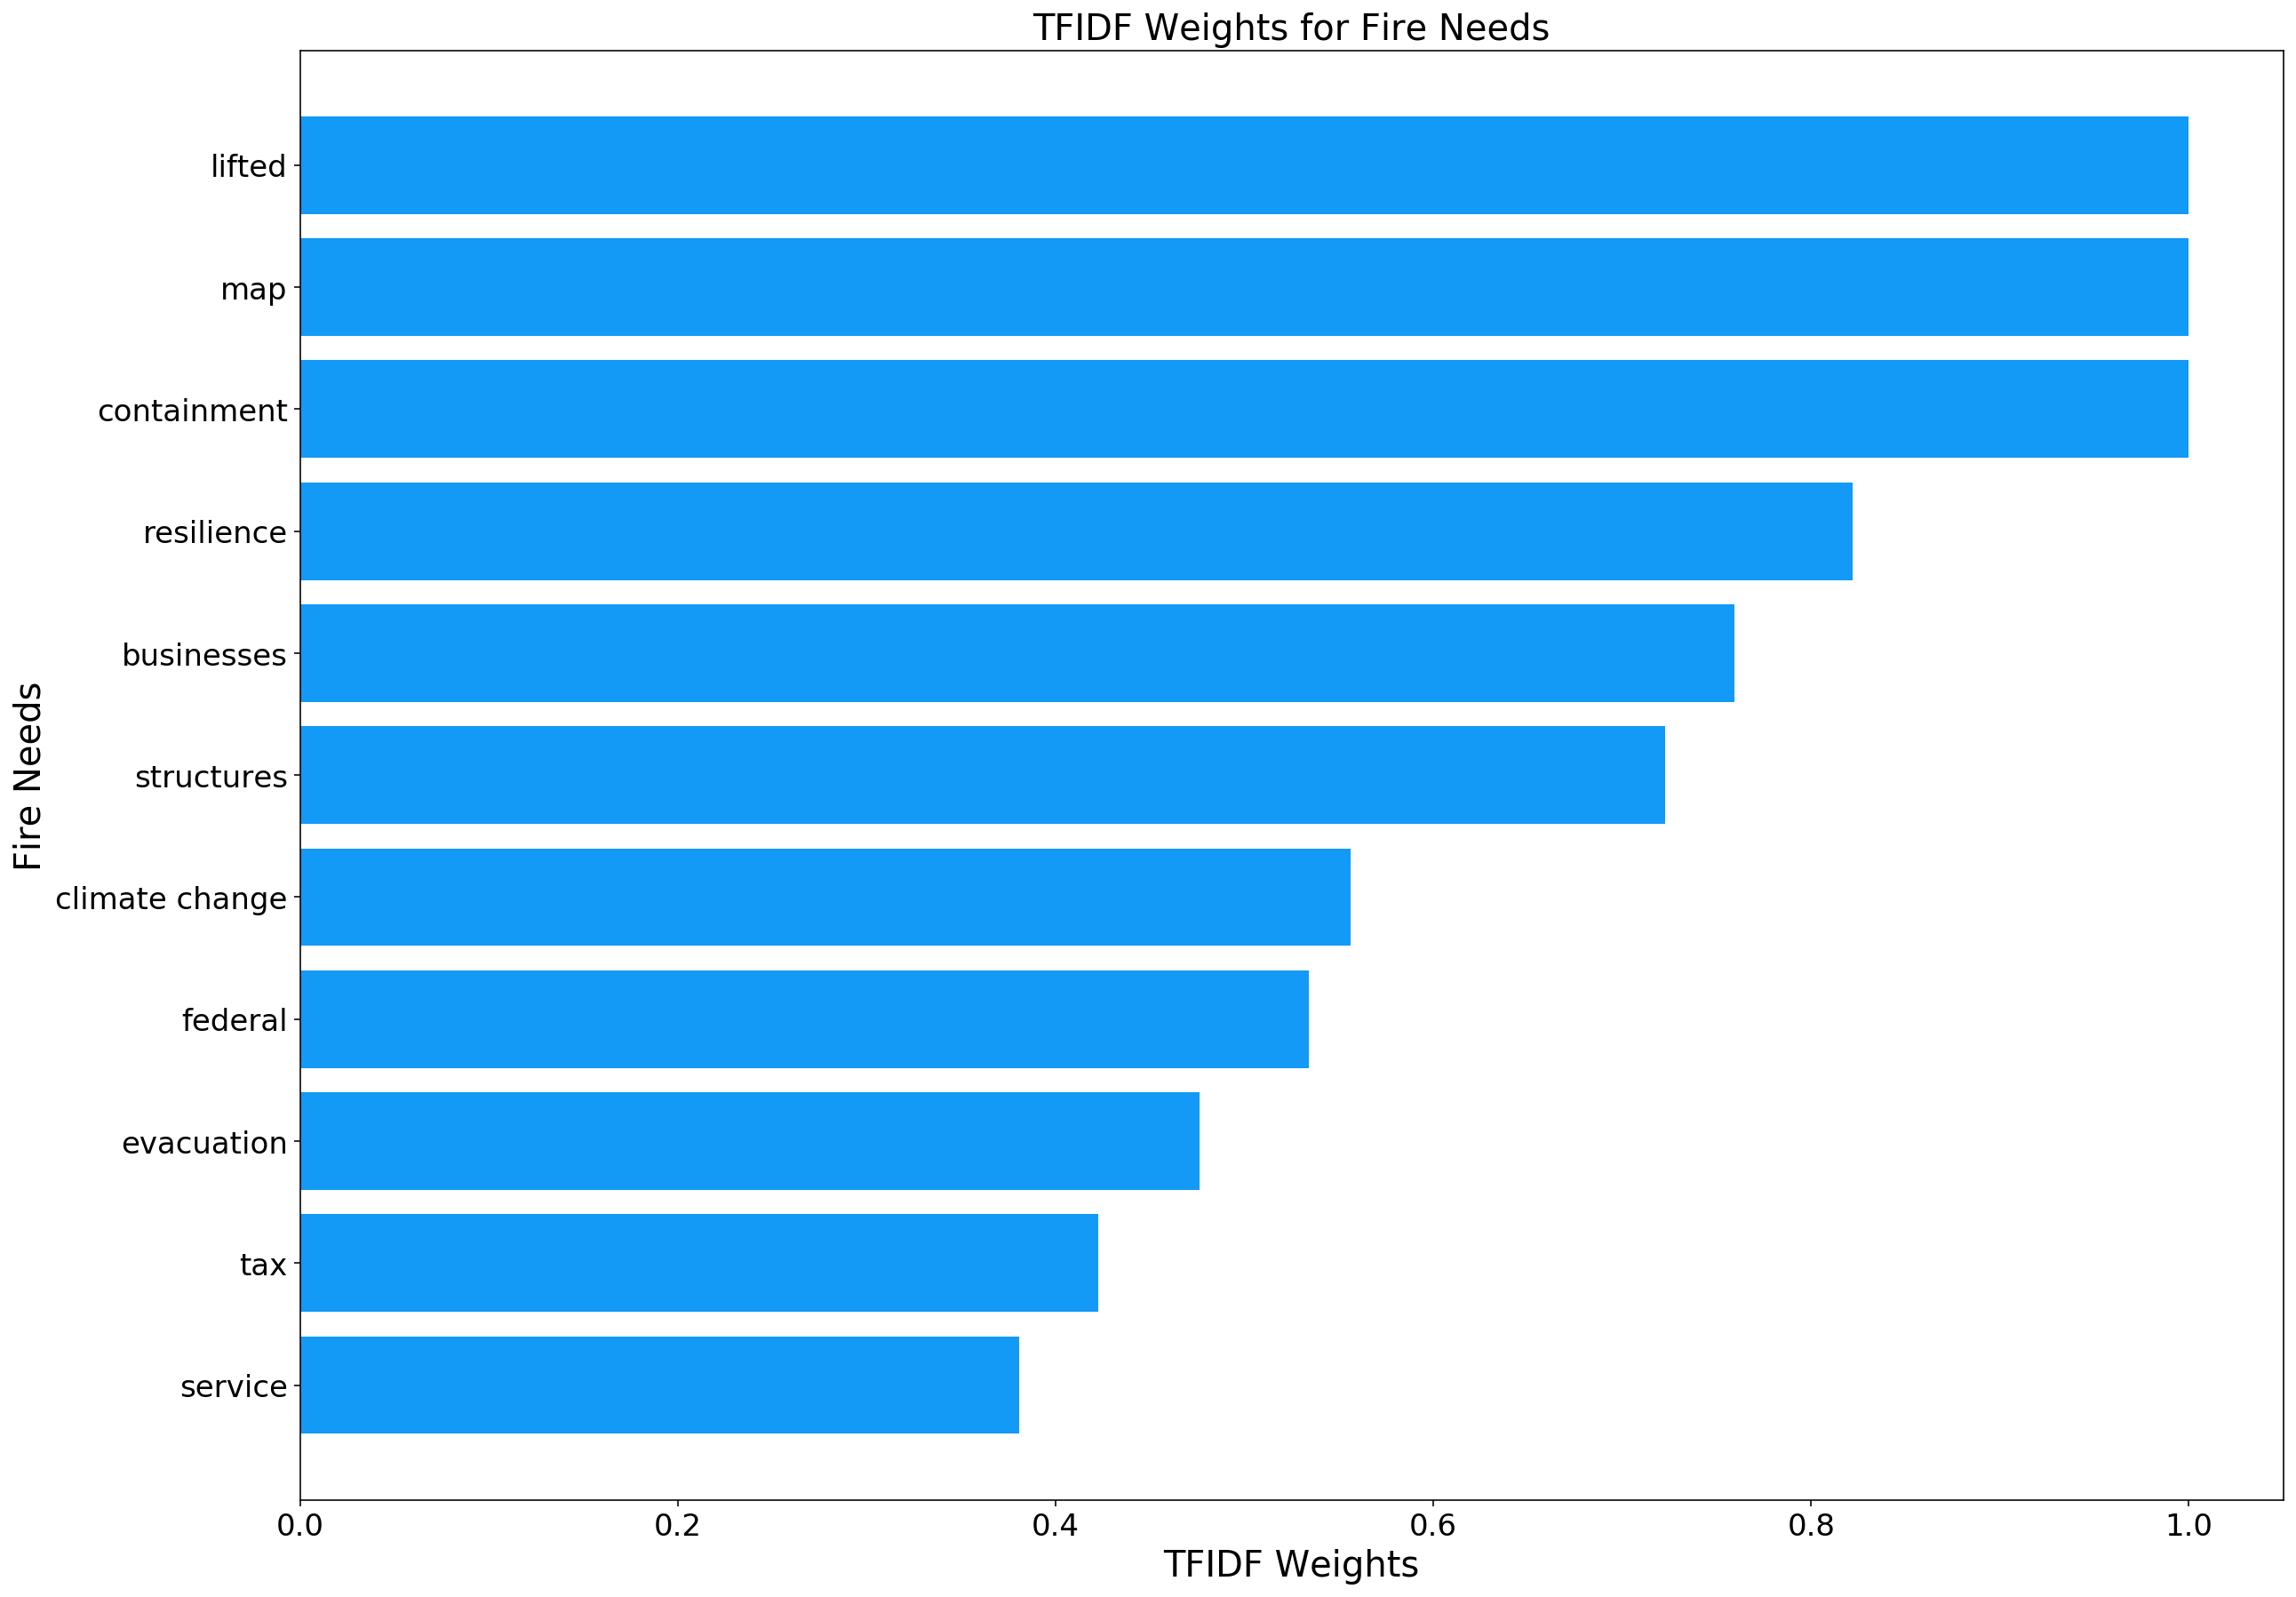

In [256]:
plt.figure(figsize=(20,15))
plt.barh(f_tfidf['words'],
        f_tfidf['weights'],
        color='#1399F6')
plt.title('TFIDF Weights for Fire Needs', fontsize=20)
plt.xlabel('TFIDF Weights', fontsize=20)
plt.ylabel('Fire Needs', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

In [60]:
for word in fire_eda['words']:
    print(f"'{word}',")

'due',
'contained',
'thank',
'back',
'wildfires',
'wildfire',
'amazing',
'god',
'containment',
'owner',
'latest',
'also',
'around',
'fire',
'across',
'lost',
'map',
'via',
'article',
'lifted',
'cal',
'ca',
'update',
'pg',
'th',
'customers',
'going',
'news',
'climate',
'resilience',
'keep',
'recent',
'full',
'burn',
'largest',
'ive',
'know',
'week',
'month',
'icymi',
'join',
'san',
'air',
'helped',
'businesses',
'great',
'emergency',
'working',
'learn',
'anniversary',
'still',
'thanks',
'winter',
'thank firefighters',
'road',
'photo',
'structures',
'students',
'reports',
'cleanup',
'every',
'well',
'saturday',
'grateful',
'big',
'lines',
'text',
'video',
'november',
'make',
'coming',
'helping',
'damage',
'night',
'free',
'seen',
'right',
'family',
'radio',
'area',
'making',
'offering',
'affected',
'go',
'day',
'kincade fire',
'year',
'help',
'donated',
'families',
'country',
'evacuations',
'support',
'acres contained',
'serving',
'special',
'wine',
'us',
'fund',
'people',
'story',
'role

In [181]:
fire[fire['text'].str.contains('evacuation')][['text']]

,text
536,the battle for the amazing effort by to save the town of from the beyond heroic work early evacuation of residents strong preparedness were integral to success h t
562,spent last night eating a meal with a group of good friends who sustained us during the so much discussion of fear grief anxiety hope find yourself a community that you can call at am in an evacuation you may need it
568,never too late to celebrate a town in californias wine country finally celebrated halloween after evacuations from the forced residents to postpone trick or treating for a week
579,so heartwarming healdsburg residents celebrate belated halloween after evacuations
603,the was burning for a couple of days and the said mph winds were coming i live in santa rosa california and my home was surrounded by evacuation zones as my wife and i talked about leaving i started thinking about my books
627,nachos a doorstop readers share the strangest things they grabbed during the evacuations
664,the in sonoma county prompted large scale evacuations on oct and forced thousands of residents to flee their homes but it wasn t just humans that were displaced by the fire pets and animals living at shelters also had to evacuate
671,as we mark the anniversary of remember that it can be a difficult reflection for many with response its mass evacuations the past weeks this possibility is even more likely if you need to talk call disaster distress helpline at
681,we love our town city of celebrates welcome home party following evacuations reports
694,in it was such a lifeline we were in an evacuation warning from the first day on when your power s out internet s off and there s no cell service radio still works heres how it helped during the


In [ ]:
all_tweets = pd.read_csv('../Data/all_tweets_clean.csv')

In [ ]:
all_tweets.shape

In [ ]:
all_tweets.drop(all_tweets[all_tweets['disaster'] == 'floods'].index, inplace = True) 

In [ ]:
all_tweets['disaster'].value_counts()

In [ ]:
hurricane = all_tweets[all_tweets['disaster']=='hurricane']

In [ ]:
fire = all_tweets[all_tweets['disaster']=='fire']

In [ ]:
hurricane_need = hurricane[hurricane['text'].str.contains('need')]

In [ ]:
fire_need = fire[fire['text'].str.contains('need')]

In [ ]:
tvec = TfidfVectorizer(stop_words=custom_sw, min_df=5, max_df=1.0,ngram_range=(1,2))

In [ ]:
term_mat = tvec.fit_transform(hurricane_need['text'])

In [ ]:
term_df = pd.DataFrame(term_mat.toarray(), columns=tvec.get_feature_names())

In [ ]:
tvec.get_feature_names()

In [ ]:
wts = []

for column in term_df.columns:
    wts.append(term_df[column].max())


In [ ]:
tfidf = pd.DataFrame({'words':term_df.columns, 'weights':wts})

In [ ]:
tfidf.sort_values('weights', ascending=False).head(25)

In [151]:
for i in range(1,233_000_000):
    if i%3 == 0 and i%4 == 0 and i%5 == 0 and i%6 == 0 and i%7 == 0 and i%8 == 0 and i%9 == 0 and i%11 == 0 and i%12 == 0 and i%13 == 0 and i%14 == 0 and i%15 == 0 and i%16 == 0 and i%17 == 0 and i%18 == 0 and i%19 == 0 and i%20 == 0:
        print(i)

                            

232792560


In [162]:
fib_list = [1,1,2,3,5,8,13,21]

def fib(n):
    return fib_list[n] - fib_list[n-1]


In [163]:
fib(7)

8